# Paper Image

In [1]:
import matplotlib.pyplot as plt
import json

def plot_loss(json_path):
    steps = []
    train_loss = []
    val_loss = []
    wer = []
    cer = []

    with open(json_path, "r", encoding="utf-8") as json_file:
        data = json.load(json_file)
        unit = data['eval_steps']
        for dict in data['log_history']:
            if dict['step'] % unit == 0:
                if dict['step'] not in steps:
                    steps.append(dict['step'])
                if 'loss' in dict:
                    train_loss.append(dict['loss'])
                if 'eval_loss' in dict:
                    val_loss.append(dict['eval_loss'])
                    wer.append(dict['eval_wer'])
                    cer.append(dict['eval_cer'])

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    axes[0].plot(steps, train_loss, label='Train Loss')
    axes[0].plot(steps, val_loss, label='Val Loss')
    axes[0].set_xlabel('steps')
    axes[0].set_ylabel('loss')
    axes[0].legend()
    axes[0].set_title('Training and Validation Loss')
    axes[0].grid(True)

    axes[1].plot(steps, wer, label='WER')
    axes[1].plot(steps, cer, label='CER')
    axes[1].set_xlabel('steps')
    axes[1].set_ylabel('error rate')
    axes[1].legend()
    axes[1].set_title('CER and WER')
    axes[1].grid(True)
    
    plt.show()

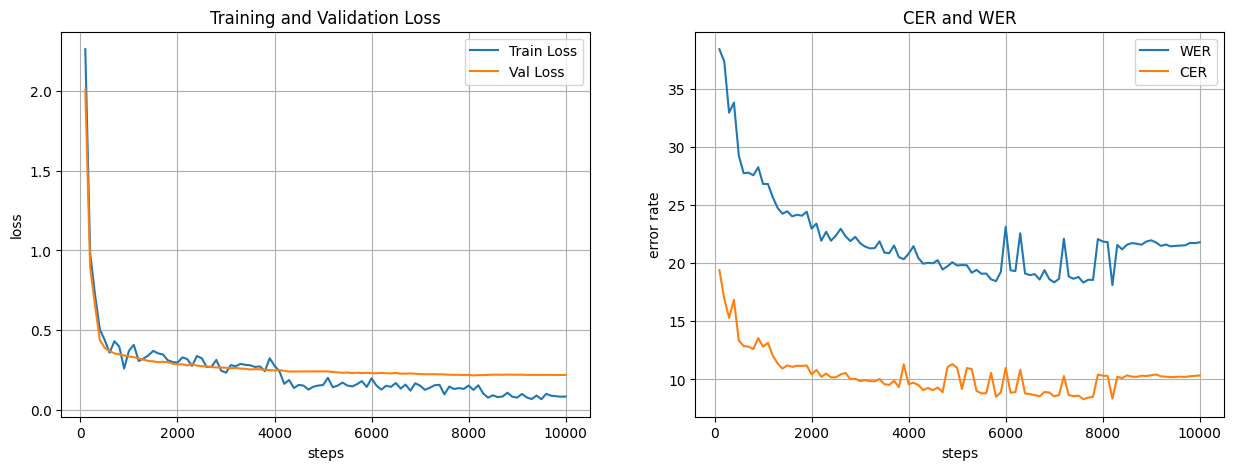

In [2]:
plot_loss("./trainer_state.json")